# Auto Insurance Payment using Simple Linear Regression

Problem of company:- A auto insurance company want to know his Predictive sale on their insunace product

Importing all libraries 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset from Excel to Python

In [6]:
data=pd.read_csv('auto_insurance_payment.csv')

Reading the head of dataset given by company

In [7]:
data.head()

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194


In [8]:
data.info() # there is no any Null value in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Number of claims  63 non-null     int64
 1    Total Payment    63 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [9]:
data.describe()

# so can see total number of claim and total payment is 63
#Avg number of claims is 22.9 for which payment was 921.88
# so far maxium claim is 124 again 4222 payment made

,Number of claims,Total Payment
count,63.000000,63.000000
mean,22.904762,921.873016
std,23.351946,878.266281
min,0.000000,0.000000
25%,7.500000,299.000000
50%,14.000000,596.000000
75%,29.000000,1364.000000
max,124.000000,4222.000000


# Expolatory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026A14582AC8>,
      dtype=object)

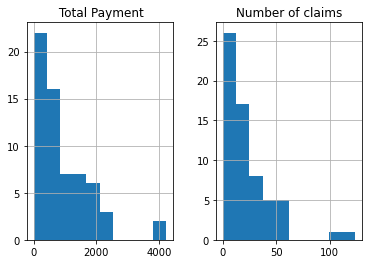

In [10]:
data.hist()

# No data for payment range between 2500 to 3500 near

In [11]:
data.corr()

# its has great correlation between both (claim and payment)

,Number of claims,Total Payment
Number of claims,1.000000,0.880668
Total Payment,0.880668,1.000000


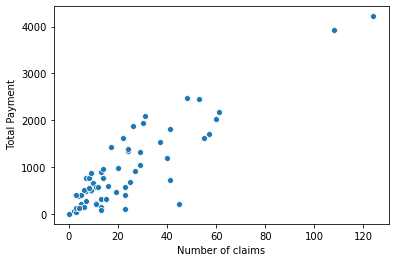

In [12]:
sns.scatterplot(data=data,x='Number of claims',y=' Total Payment')

# also there is linearity between data hence good for model

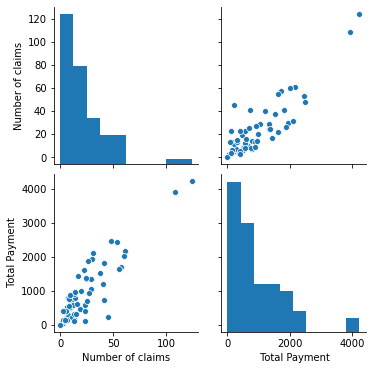

In [13]:
sns.pairplot(data)

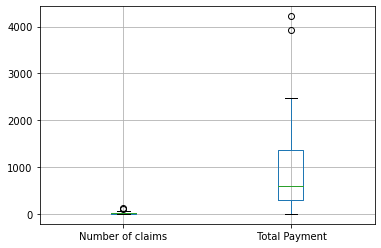

In [14]:
data.boxplot()

# data have very less outliers hence good sign for mdel building

# Split X and Y to build mode

spliting data in Training and testing

In [15]:
x=data.iloc[:,:1]

y=data.iloc[:,1:]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)



In [24]:
X_train.shape

(50, 1)

In [25]:
X_test.shape

(13, 1)

In [26]:
y_train.shape

(50, 1)

In [27]:
y_test.shape

(13, 1)

# Import LinearRegression model to fit training data

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lin_reg=LinearRegression()

# Train the Model

In [30]:
lin_reg.fit(X_train,y_train)

LinearRegression()

# Check coefficient

In [31]:
#coefficient: Change in one variable affect another call coefficient

data_coef=pd.DataFrame(lin_reg.coef_,x.columns,columns=['Coeff'])

In [32]:
data_coef

# so we can say, One unit change in x is associate with Y (ie- 32.14)

,Coeff
Number of claims,32.143575


# Prediction

In [34]:
Predict=lin_reg.predict(X_test)

In [35]:
compare_date=pd.DataFrame(Predict,columns=['New_value_Predicted'])

In [36]:
compare_date.head() # we have predicted new values 

,New_value_Predicted
0,2155.635546
1,3666.383568
2,612.743949
3,484.169649
4,291.308200


# Predicted data via visualization

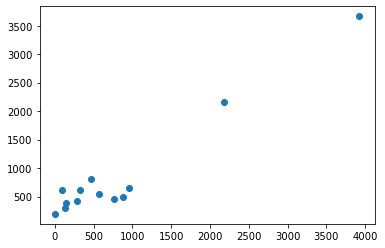

In [37]:
plt.scatter(y_test,Predict)

# so can see data is linear side that mean model is good fit

# Check Residual

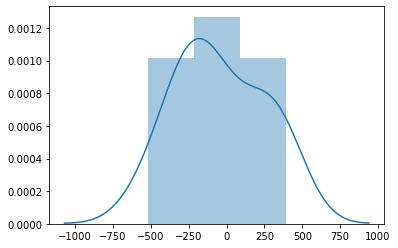

In [38]:
# Residual: Actual-Predicted

sns.distplot(y_test-Predict)

#so we can see not huge variation hence model has good fited

# Performance Metrics

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
RMSE=np.sqrt(mean_squared_error(y_test,Predict))

r_square=r2_score(y_test,Predict)

In [52]:
print('Root Mean square error value is...',RMSE)
print('r square value is...', r_square)

Root Mean square error value is... 281.1486957455126
r square value is... 0.9284723758722918


Model is perfect with 92 % accuracy

**********************************************The End***************************************************************************